# Color Identification in Images

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

## 2. Import Image

We're reading the image, and resizing it to fit the screen better.

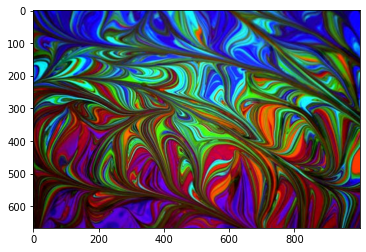

In [2]:
img = cv2.imread("colors2.jpg")
h, w = img.shape[0], img.shape[1]

# resize image to 1000 px
scale = 1000 / max(h,w)
dim = (int(w*scale), int(h*scale))
# print(dim, scale)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(img)

## 3. Read List of Colors

Importing 'colors.csv', a file containing color names and their RGB values to be used in color identification. This file is provided by codebrainz on github.

In [3]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

# set global variables
clicked = False
r = g = b = xpos = ypos = 0

## 4. Creating Function to Recognize Colors

In [4]:
# To be called when we double click on an area of the image. It will return the color name and the RGB values of that color.

def recognize_color(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

## 5. Function to detect mouse click

In [5]:
# function to set double click event
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

## 6. Setting up Application Interface

In [6]:
cv2.namedWindow('Color Identifier')
cv2.setMouseCallback('Color Identifier', mouse_click)

Loop to start and run the application window.
Application will stop upon pressing 'esc' key.

In [7]:
while(1):
    cv2.imshow("Color Identifier", img)
    if (clicked):
   
        # cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)
        
        # Creating text string to display( Color name and RGB values )
        text = recognize_color(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        
        # For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False
        
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()